#Milsestone 2

##I. Perkenalan
Theo Jonathan

FTDS Batch 20
##I.I Objective
* Mampu memahami konsep Computer Vision/NLP.
* Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP.
* Mampu mengimplementasikan Artificial Neural Network dengan data yang dipilih.
* Mampu menganalisis dan menjelaskan performansi dari arsitektur Artificial Neural Network yang dibuat.
* Membuat model Computer Vision untuk mendeteksi adanya kanker kulit atau tidak.
* Melakukan model improvement untuk memperbaiki performa model awal.

###I.II Dataset
Dataset berisi gambar kondisi kulit yang terkena kanker dan tidak. Dataset terbagi menjadi 2 label yaitu cancer dan non cancer.

https://www.kaggle.com/datasets/kylegraupe/skin-cancer-binary-classification-dataset

###I.III Background
Saya ditugaskan oleh sebuah rumah sakit untuk membantu menentukan apakah pasien mereka mengidap kanker kulit atau tidak. Dengan dataset yang ada, saya akan mencoba untuk membuat model Computer Vision yang bisa menentukan apakah pasien mengidap kanker kulit atau tidak berdasarkan hasil foto yang diambil pihak rumah sakit.

##II. Import Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
import os
import glob
import random
import cv2
import shutil

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Reshape, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.io import read_file
from tensorflow.image import decode_image, resize
from tensorflow import expand_dims
import requests
from PIL import Image
from io import BytesIO
print('Tensorflow version', tf.__version__)

import pickle
import json

import warnings
warnings.filterwarnings(action='ignore')

Tensorflow version 2.12.0


##III. Data Loading

In [2]:
#Koneksi dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Memasukan path file data
data_path = '/content/drive/MyDrive/cancer_dataset'

In [4]:
#Path ke folder
cancer_path = os.path.join(data_path, 'Cancer')
non_cancer_path = os.path.join(data_path, 'Non_Cancer')

In [5]:
#Melihat list gambar dari setiap folder
print('List of images in cancer_path: ')
for file in os.listdir(cancer_path):
  print(file)

print('List of images in non_cancer_path: ')
for file in os.listdir(non_cancer_path):
  print(file)

List of images in cancer_path: 
1714-02.jpg
1777-1.JPG
1811-3.JPG
1780.JPG
1789-02.JPG
1780.1.JPG
1718-2.jpg
1905.JPG
1861-02.JPG
1847.JPG
1864-1.JPG
1969-1.JPG
1847 (7).JPG
1877.JPG
1877(2).JPG
2108.1.JPG
2085-2.JPG
1991 (1).JPG
1992.JPG
1969-2.JPG
1988-01.JPG
2099 (3).JPG
2229-2.JPG.JPG
2229-1.JPG.JPG
2510-2.JPG
2400-1.JPG
2301-1.JPG
2241-02.JPG
2343-2.JPG
2535-2.JPG
2197-03.JPG
2535-6.JPG
2628-2q1.JPG
2535-3.JPG
2535-3q2.JPG
2535-3q1.JPG
2628-1.JPG
2564-02.JPG
2632-4.JPG
2628-1q1.JPG
2628-2.JPG
113-1.JPG
1031-1.jpg
1007-1.jpg
2664-2.JPG
1051-3(94).jpg
1051-3(95).jpg
1157-01.JPG
1012-2.JPG
1010-01.JPG
1435-1.JPG
156.JPG
1543.JPG
1435-2.JPG
1545.JPG
1239-2.JPG
1435-3.JPG
14-8.JPG
120.2.JPG
1540-4.JPG
311-2.JPG
17 (1).JPG
341-2.JPG
234-1.JPG
236-2.JPG
1654-1.jpg
311-1.JPG
1714-01.jpg
1703.JPG
1563-03.jpg
341-5.JPG
801.JPG
646.1.JPG
728.3.JPG
412-3.JPG
650-2.JPG
680.JPG
73-2.JPG
650-1.JPG
402-3.JPG
DSC_0061.JPG
933-2.JPG
933-1.JPG
DSC_0061q.JPG
List of images in non_cancer_path: 
1032.j

##IV. Exploratory Data Analysis (EDA)

In [6]:
#Membuat list
filepaths = []
filenames = []
labels= []
dict_list = [cancer_path, non_cancer_path]

#Looping
for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
      filenames.append(f)
      fpath=os.path.join(j,f)
      filepaths.append(fpath)
      if i==0:
        labels.append('Cancer')
      else:
        labels.append('Non_Cancer')


Filepath_series = pd.Series(filepaths, name="filepaths")
Filenames_series = pd.Series(filenames, name="filenames")
Label_series = pd.Series(labels, name="labels")

#Membuat dataframe
main_data = pd.concat([Filepath_series, Filenames_series, Label_series], axis=1)
main_df = pd.DataFrame(main_data)
print(main_df["labels"].value_counts())
main_df

Non_Cancer    204
Cancer         84
Name: labels, dtype: int64


filepaths    filenames  \
0    /content/drive/MyDrive/cancer_dataset/Cancer/1...  1714-02.jpg   
1    /content/drive/MyDrive/cancer_dataset/Cancer/1...   1777-1.JPG   
2    /content/drive/MyDrive/cancer_dataset/Cancer/1...   1811-3.JPG   
3    /content/drive/MyDrive/cancer_dataset/Cancer/1...     1780.JPG   
4    /content/drive/MyDrive/cancer_dataset/Cancer/1...  1789-02.JPG   
..                                                 ...          ...   
283  /content/drive/MyDrive/cancer_dataset/Non_Canc...    661-2.JPG   
284  /content/drive/MyDrive/cancer_dataset/Non_Canc...    669-3.JPG   
285  /content/drive/MyDrive/cancer_dataset/Non_Canc...    669-1.JPG   
286  /content/drive/MyDrive/cancer_dataset/Non_Canc...      641.JPG   
287  /content/drive/MyDrive/cancer_dataset/Non_Canc...      663.JPG   

         labels  
0        Cancer  
1        Cancer  
2        Cancer  
3        Cancer  
4        Cancer  
..          ...  
283  Non_Cancer  
284  Non_Cancer  
285  Non_Cancer  
286  Non_Cancer  
287  Non_Cancer  

[288 rows x 3 columns]

* Dataset terdiri dari 288 data gambar.
* Semua data gambar dalam format JPG.
* Ukuran data gambar semua berbeda.

In [7]:
#Memeriksa apakah ada data duplikat
main_df.duplicated().sum()

0

Tidak ada data duplikat dalam dataset.

In [8]:
#Memeriksa unique values
categoricals = ['labels']
for i in categoricals:
    print(i)
    print(main_df[i].value_counts())
    print()

print('Total Unique Value :',main_df['labels'].nunique())

labels
Non_Cancer    204
Cancer         84
Name: labels, dtype: int64

Total Unique Value : 2


* Data terbagi menjadi 2 label yaitu Cancer dan Non_Cancer
* Hanya ada 2 unique values pada dataset yaitu Non_Cancer dan Cancer.

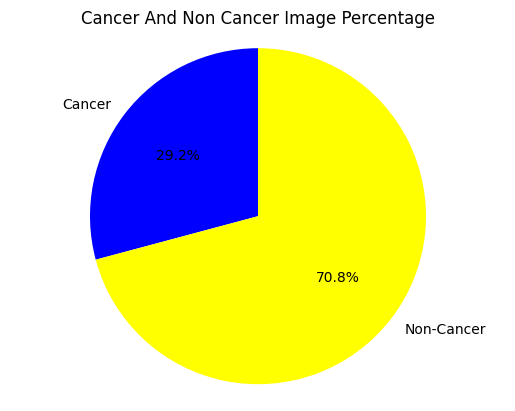

In [9]:
#Visualisasi persentase data gambar
labels = ['Cancer', 'Non-Cancer']
df_cancer = os.listdir(cancer_path)
num_cancer = len(df_cancer)
df_non_cancer = os.listdir(non_cancer_path)
num_non_cancer = len(df_non_cancer)
sizes = [num_cancer, num_non_cancer]
colors = ['blue', 'yellow']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Cancer And Non Cancer Image Percentage')
plt.show()

Terlihat bahwa data gambar non cancer memiliki persentase lebih besar yaitu 70.8% dibandingkan data gambar cancer yang mempunyai persentase lebih kecil yaitu 29.2%. Dengan terlihatnya data gambar non cancer yang lebih banyak daripada data gambar cancer, menunjukan bahwa dataset ini imbalance.

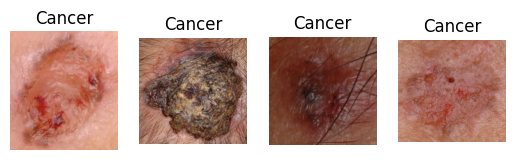

In [10]:
# Visualisasi beberapa sampel gambar cancer
cancer_samples = os.listdir(cancer_path)[:4]
for i, sample in enumerate(cancer_samples):
    sample_path = os.path.join(cancer_path, sample)
    img = Image.open(sample_path)
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title('Cancer')
    plt.axis('off')
plt.show()

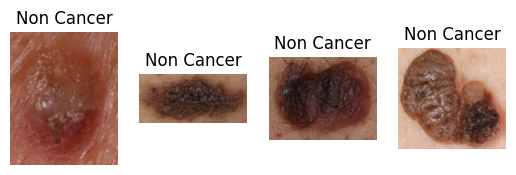

In [11]:
# Visualisasi beberapa sampel gambar non cancer
non_cancer_samples = os.listdir(non_cancer_path)[:4]
for i, sample in enumerate(non_cancer_samples):
    sample_path = os.path.join(non_cancer_path, sample)
    img = Image.open(sample_path)
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title('Non Cancer')
    plt.axis('off')
plt.show()

Ada tiga jenis utama/kelas kanker kulit:
* Karsinoma sel basal
* Karsinoma sel skuamosa
* Melanoma


1. Karsinoma sel basal bisa berupa benjolan seperti mutiara atau lilin
Lesi yang rata, berwarna seperti daging atau coklat seperti bekas luka.

2. Karsinoma sel skuamosa dapat muncul sebagai nodul merah atau lesi datar dengan permukaan bersisik dan berkerak.

3. Melanoma bisa berupa beberapa bentuk:
- Bintik kecoklatan besar dengan bintik-bintik lebih gelap
- Tahi lalat yang berubah warna, ukuran atau rasa atau yang berdarah
- Lesi kecil dengan batas tidak beraturan dan bagian yang tampak merah, merah muda, putih, biru atau biru-hitam
- Lesi gelap pada telapak tangan, telapak kaki, ujung jari tangan atau kaki, atau pada selaput lendir yang melapisi mulut, hidung, vagina atau anus Anda.

Berdasarkan kelas dan ciri-ciri diatas, kita bisa lihat dari data gambar cancer merupakan Skin Cancer dan data gambar non cancer bukan merupakan Skin Cancer. Namun kita harus memastikan bahwa model bisa mengenali ciri-ciri tersebut untuk melakukan klasifikasi yang tepat, maka data gambar akan di melewati proses feature engineering agar bisa diterima oleh model.

Reference :https://nurseberkarya.blogspot.com/2019/05/kanker-kulit-penyebab-pencegahan.html


In [12]:
#Melihat ukuran gambar data cancer
for img_file in os.listdir(cancer_path):
    img_path = os.path.join(cancer_path, img_file)
    img = cv2.imread(img_path)
    height, width, channels = img.shape
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    size_mean = np.mean([height, width])
    size_min = np.min([height, width])
    size_max = np.max([height, width])

    pixel_mean = np.mean(gray_img)
    pixel_min = np.min(gray_img)
    pixel_max = np.max(gray_img)

In [13]:
print("Image: {} (Cancer)".format(img_file))
print("Size: Mean={}, Min={}, Max={}".format(size_mean, size_min, size_max))
print("Pixel Values: Mean={}, Min={}, Max={}".format(pixel_mean, pixel_min, pixel_max))

Image: DSC_0061q.JPG (Cancer)
Size: Mean=250.0, Min=210, Max=290
Pixel Values: Mean=123.89064039408866, Min=37, Max=231


Data gambar cancer rata-rata size sebesar 250, size terkecil 210, dan size terbesar 290. Untuk pixel mempunyai rata-rata 123.89, paling kecil 37 dan paling besar 231.

In [14]:
#Melihat ukuran gambar data non cancer
for img_file in os.listdir(non_cancer_path):
    img_path = os.path.join(non_cancer_path, img_file)
    img = cv2.imread(img_path)
    height, width, channels = img.shape
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    size_mean = np.mean([height, width])
    size_min = np.min([height, width])
    size_max = np.max([height, width])

    pixel_mean = np.mean(gray_img)
    pixel_min = np.min(gray_img)
    pixel_max = np.max(gray_img)

In [15]:
print("Image: {} (Non_Cancer)".format(img_file))
print("Size: Mean={}, Min={}, Max={}".format(size_mean, size_min, size_max))
print("Pixel Values: Mean={}, Min={}, Max={}".format(pixel_mean, pixel_min, pixel_max))

Image: 663.JPG (Non_Cancer)
Size: Mean=255.0, Min=240, Max=270
Pixel Values: Mean=179.23547839506173, Min=100, Max=246


Data gambar non cancer rata-rata size sebesar 225, size terkecil 240, dan size terbesar 270. Untuk pixel mempunyai rata-rata 179.23, paling kecil 100 dan paling besar 246.

##V. Feature Engineering

###V.I Resize

In [16]:
#Memeriksa dimensi data gambar cancer dan resize
for filename in os.listdir(cancer_path):
    img_path = os.path.join(cancer_path, filename)
    img = cv2.imread(img_path)

#Cek dimensi gambar
    if img is not None:
        print(filename, 'dimensions:', img.shape)
    else:
        print('Unable to read image:', filename)
        continue

#Resize gambar
    resized = cv2.resize(img, (width, height))

1714-02.jpg dimensions: (550, 500, 3)
1777-1.JPG dimensions: (1300, 1320, 3)
1811-3.JPG dimensions: (380, 380, 3)
1780.JPG dimensions: (560, 590, 3)
1789-02.JPG dimensions: (280, 260, 3)
1780.1.JPG dimensions: (200, 200, 3)
1718-2.jpg dimensions: (890, 1190, 3)
1905.JPG dimensions: (270, 650, 3)
1861-02.JPG dimensions: (1150, 740, 3)
1847.JPG dimensions: (670, 830, 3)
1864-1.JPG dimensions: (1180, 1090, 3)
1969-1.JPG dimensions: (290, 330, 3)
1847 (7).JPG dimensions: (380, 320, 3)
1877.JPG dimensions: (390, 560, 3)
1877(2).JPG dimensions: (290, 300, 3)
2108.1.JPG dimensions: (1610, 2230, 3)
2085-2.JPG dimensions: (280, 260, 3)
1991 (1).JPG dimensions: (640, 640, 3)
1992.JPG dimensions: (400, 480, 3)
1969-2.JPG dimensions: (890, 1290, 3)
1988-01.JPG dimensions: (270, 330, 3)
2099 (3).JPG dimensions: (600, 610, 3)
2229-2.JPG.JPG dimensions: (440, 530, 3)
2229-1.JPG.JPG dimensions: (250, 270, 3)
2510-2.JPG dimensions: (570, 1180, 3)
2400-1.JPG dimensions: (900, 700, 3)
2301-1.JPG dimensio

In [17]:
#Memeriksa dimensi data gambar non cancer dan resize
for filename in os.listdir(non_cancer_path):
    img_path = os.path.join(non_cancer_path, filename)
    img = cv2.imread(img_path)

    if img is not None:
        print(filename, 'dimensions:', img.shape)
    else:
        print('Unable to read image:', filename)
        continue

    resized = cv2.resize(img, (width, height))

1032.jpg dimensions: (160, 130, 3)
1006-2.JPG dimensions: (400, 880, 3)
1012.JPG dimensions: (170, 220, 3)
1009-1.JPG dimensions: (270, 290, 3)
1045-2.JPG dimensions: (320, 280, 3)
102-1.JPG dimensions: (140, 160, 3)
1054.JPG dimensions: (160, 170, 3)
1125.JPG dimensions: (530, 580, 3)
1058-2.JPG dimensions: (260, 210, 3)
1135.1.JPG dimensions: (100, 130, 3)
1127-1.JPG dimensions: (290, 160, 3)
1086-01.JPG dimensions: (270, 220, 3)
1081-1.JPG dimensions: (240, 230, 3)
108-1.JPG dimensions: (820, 630, 3)
1065.jpg dimensions: (150, 150, 3)
1111.JPG dimensions: (120, 120, 3)
1139-01.JPG dimensions: (170, 160, 3)
1121.JPG dimensions: (300, 360, 3)
1255.JPG dimensions: (140, 130, 3)
1161-01.JPG dimensions: (160, 180, 3)
1150-01.JPG dimensions: (300, 230, 3)
1244.JPG dimensions: (100, 120, 3)
1142-01.JPG dimensions: (220, 210, 3)
1272-2.JPG dimensions: (180, 150, 3)
1295.JPG dimensions: (230, 160, 3)
1174-01.JPG dimensions: (250, 150, 3)
114-2.JPG dimensions: (300, 320, 3)
1151-01.JPG dimens

Sebelum memasukan data ke model, data harus mengalami resize agar semua data menjadi sama dan bisa diterima oleh model.

###V.I Splitting Dataset

In [18]:
#Membagi menjadi Train val Set & Test Set
train_val_images, test_images = train_test_split(main_df, test_size=0.2, random_state=77)

#Membagi menjadi Train Set & Val Set
train_images, val_images = train_test_split(train_val_images, test_size=0.2, random_state=77)

In [19]:
print('Train Set shape : ', train_images.shape)
print('Val Set shape : ', val_images.shape)
print('Test Set shape : ', test_images.shape)

Train Set shape :  (184, 3)
Val Set shape :  (46, 3)
Test Set shape :  (58, 3)


###V.II Data Preprocessing

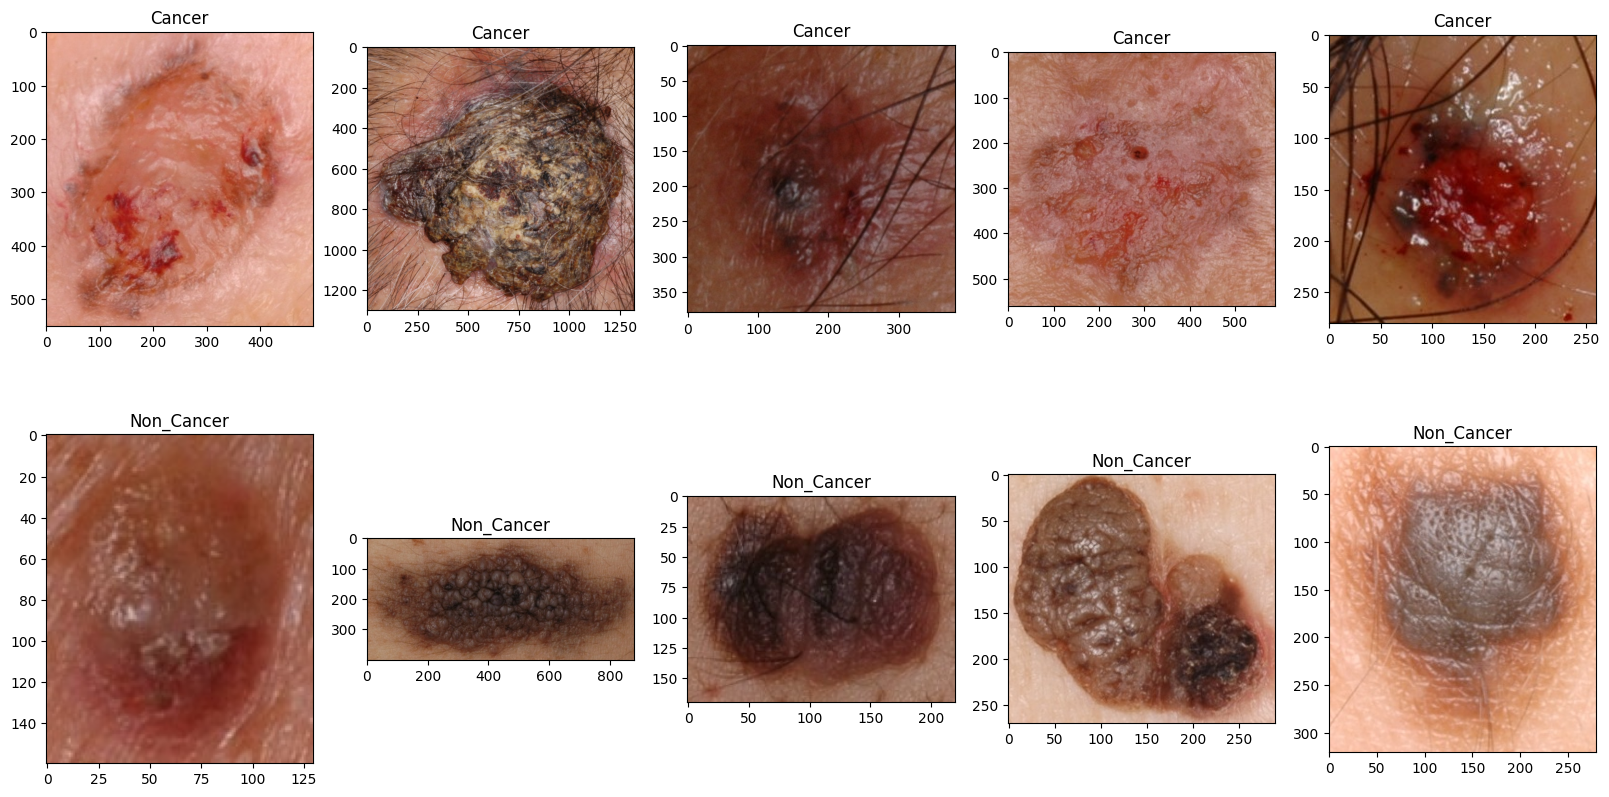

In [20]:
#Melihat sample dari kedua kelas
cancer_samples = (main_df[main_df['labels']=="Cancer"]['filepaths'].iloc[:5]).tolist()
non_cancer_samples = (main_df[main_df['labels']=='Non_Cancer']['filepaths'].iloc[:5]).tolist()

def visualize_samples(samples):
    fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        ax[i//5, i%5].set_title(sample.split('/')[-2])
        ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

visualize_samples(cancer_samples + non_cancer_samples)

In [21]:
#Membuat Image Data Generator
image_gen = ImageDataGenerator(
    rescale = 1./255,
    brightness_range = (0.5,1.5),
    horizontal_flip=True,
    dtype='float32'
)

image_gen_ = ImageDataGenerator(
    rescale = 1./255,
    dtype='float32'
)

In [22]:
#Membuat Pipeline

train = image_gen.flow_from_dataframe(dataframe= train_images,x_col="filepaths",y_col="labels",
                                      target_size=(128,128),
                                      color_mode='rgb',
                                      class_mode="binary",
                                      batch_size=256,
                                      shuffle=True
                                     )

val = image_gen_.flow_from_dataframe(dataframe= val_images,x_col="filepaths", y_col="labels",
                                    target_size=(128,128),
                                    color_mode='rgb',
                                    class_mode="binary",
                                    batch_size=256,
                                    shuffle=False
                                   )

test = image_gen_.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(128,128),
                                     color_mode='rgb',
                                     class_mode="binary",
                                     batch_size=256,
                                     shuffle=False
                                    )

Found 184 validated image filenames belonging to 2 classes.
Found 46 validated image filenames belonging to 2 classes.
Found 58 validated image filenames belonging to 2 classes.


In [23]:
train.class_indices

{'Cancer': 0, 'Non_Cancer': 1}

In [24]:
val.class_indices

{'Cancer': 0, 'Non_Cancer': 1}

In [25]:
test.class_indices

{'Cancer': 0, 'Non_Cancer': 1}

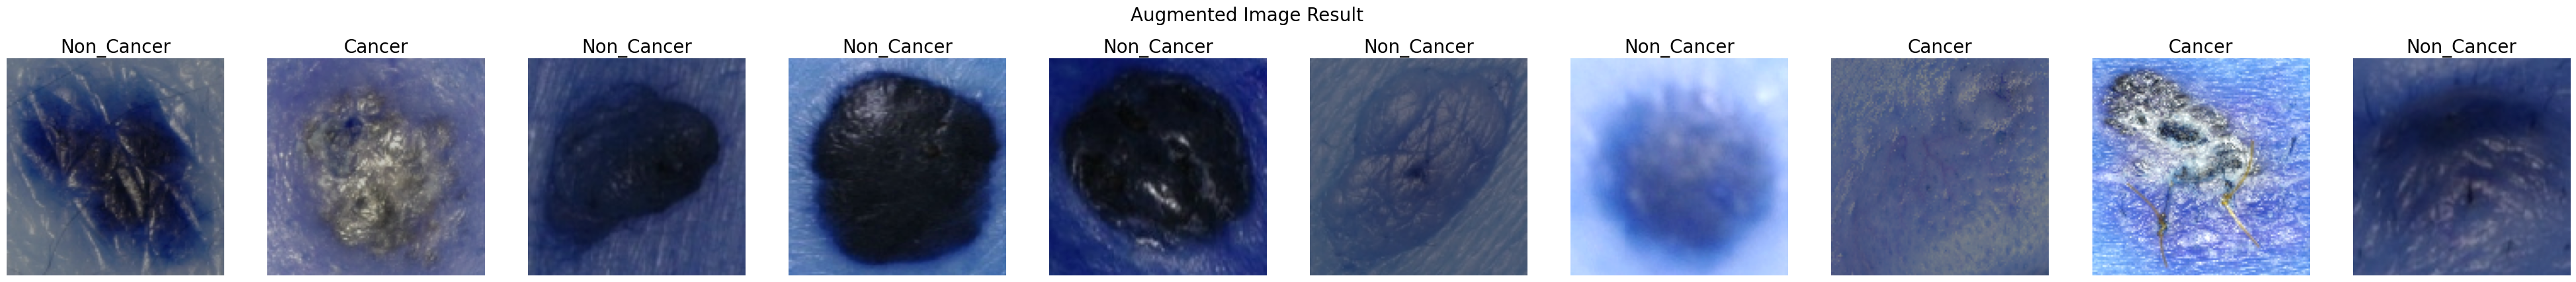

In [26]:
#Melihat gambar yang augmented
images, labels = next(train)

fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(50,5))
plt.suptitle('Augmented Image Result', fontsize=20)
for i in range(10):
    img = images[i]

    if labels[i] == 0:
        ax[i].set_title('Cancer', size=20)
    else:
        ax[i].set_title('Non_Cancer', size=20)

    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_axis_off()

plt.show()

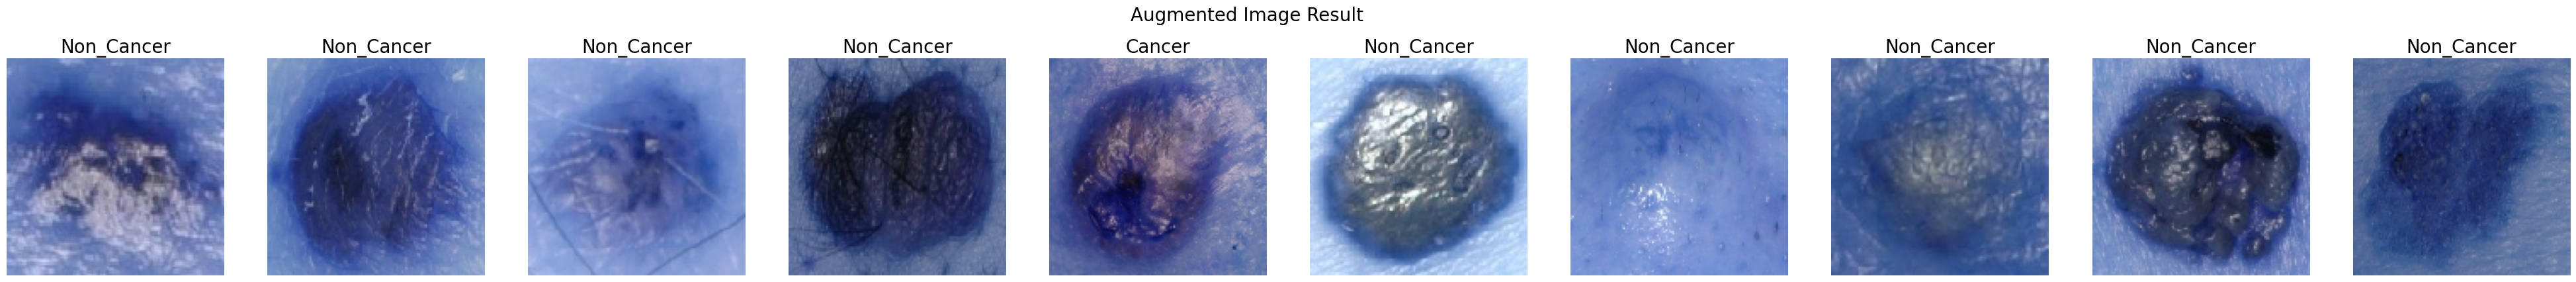

In [27]:
#Melihat gambar yang augmented
images, labels = next(val)

fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(50,5))
plt.suptitle('Augmented Image Result', fontsize=20)
for i in range(10):
    img = images[i]

    if labels[i] == 0:
        ax[i].set_title('Cancer', size=20)
    else:
        ax[i].set_title('Non_Cancer', size=20)

    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_axis_off()

plt.show()

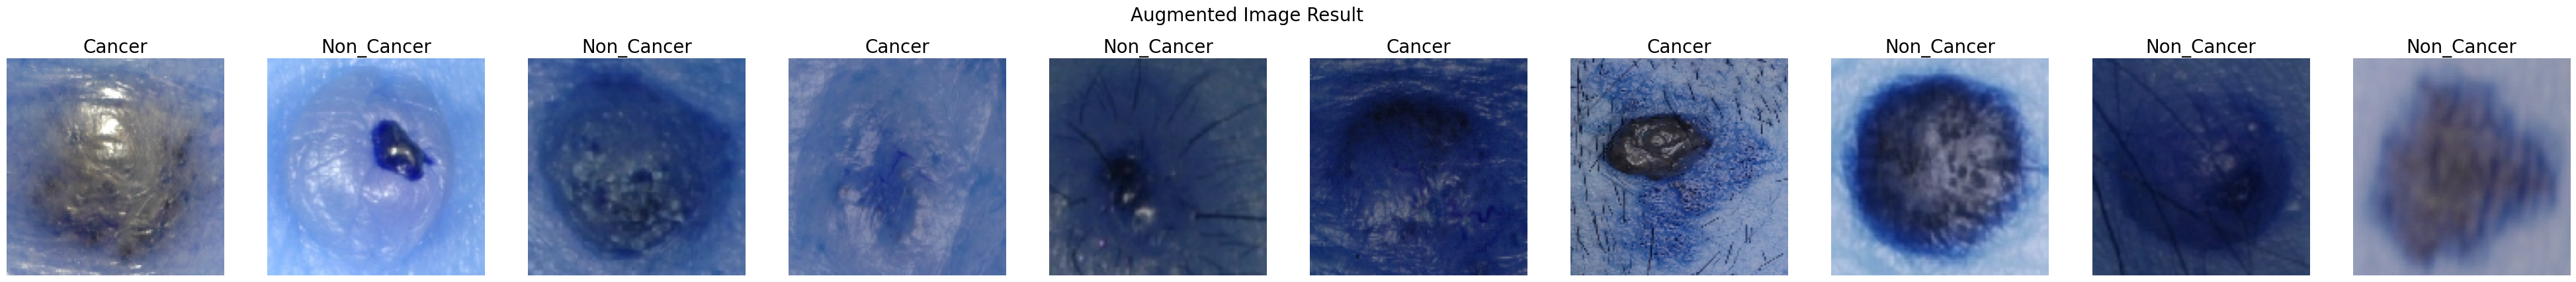

In [28]:
#Melihat gambar yang augmented
images, labels = next(test)

fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(50,5))
plt.suptitle('Augmented Image Result', fontsize=20)
for i in range(10):
    img = images[i]

    if labels[i] == 0:
        ax[i].set_title('Cancer', size=20)
    else:
        ax[i].set_title('Non_Cancer', size=20)

    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_axis_off()

plt.show()

Setelah data dimasukan augmented, jadi terlihat data gambar mana yang termasuk cancer dan data gambar mana yang termasuk non cancer.

##VI. Model Definition

In [29]:
#Model Yang digunakan
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3, activation="relu", padding="same", input_shape=(128,128,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                                 
 dense (Dense)               (None, 64)                16777280  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,779,137
Trainable params: 16,779,137
Non-trainable params: 0
____________________________________________

##VII. Model Training

###VII.I Base model

In [30]:
#Mengatur Callbacks
callbacks = [EarlyStopping(monitor = 'val_loss',
                           mode = 'min',
                           patience = 3,
                           restore_best_weights=True),

            ModelCheckpoint('base_model.h5',
                            monitor='val_loss',
                            save_best_only=True)
            ]

In [43]:
#Fit ke dalam model
History = model.fit(train, validation_data= val, epochs=20,
                    verbose=1, callbacks=callbacks)

#Fungsi untuk evaluasi
metrics_df = pd.DataFrame(History.history)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.7157 - accuracy: 0.7011 - val_loss: 1.1095 - val_accuracy: 0.2609
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 1.0924 - accuracy: 0.2989 - val_loss: 0.9114 - val_accuracy: 0.2609
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.8948 - accuracy: 0.2989 - val_loss: 0.7446 - val_accuracy: 0.2609
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.7368 - accuracy: 0.2989 - val_loss: 0.6927 - val_accuracy: 0.7391
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.6928 - accuracy: 0.7011 - val_loss: 0.8951 - val_accuracy: 0.2609
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.8890 - accuracy: 0.2989 - val_loss: 0.6924 - val_accuracy: 0.7391
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.6925 - accuracy: 0.7011 - val_loss: 0.6923 - val_accuracy: 0.7391
Epoch 8/20
1/1 [=========================

In [44]:
#Masukan ke dalam DataFrame
history_seq_df = pd.DataFrame(History.history)
history_seq_df

loss  accuracy  val_loss  val_accuracy
0   0.715654  0.701087  1.109549       0.26087
1   1.092443  0.298913  0.911404       0.26087
2   0.894836  0.298913  0.744596       0.26087
3   0.736811  0.298913  0.692711       0.73913
4   0.692777  0.701087  0.895076       0.26087
5   0.889011  0.298913  0.692433       0.73913
6   0.692547  0.701087  0.692284       0.73913
7   0.692422  0.701087  0.692132       0.73913
8   0.692294  0.701087  0.691978       0.73913
9   0.692165  0.701087  0.691822       0.73913
10  0.692033  0.701087  0.691664       0.73913
11  0.691900  0.701087  0.691503       0.73913
12  0.691766  0.701087  0.691341       0.73913
13  0.691630  0.701087  0.691178       0.73913
14  0.691492  0.701087  0.691012       0.73913
15  0.691353  0.701087  0.690845       0.73913
16  0.691213  0.701087  0.690677       0.73913
17  0.691072  0.701087  0.690507       0.73913
18  0.690930  0.701087  0.690337       0.73913
19  0.690786  0.701087  0.690165       0.73913

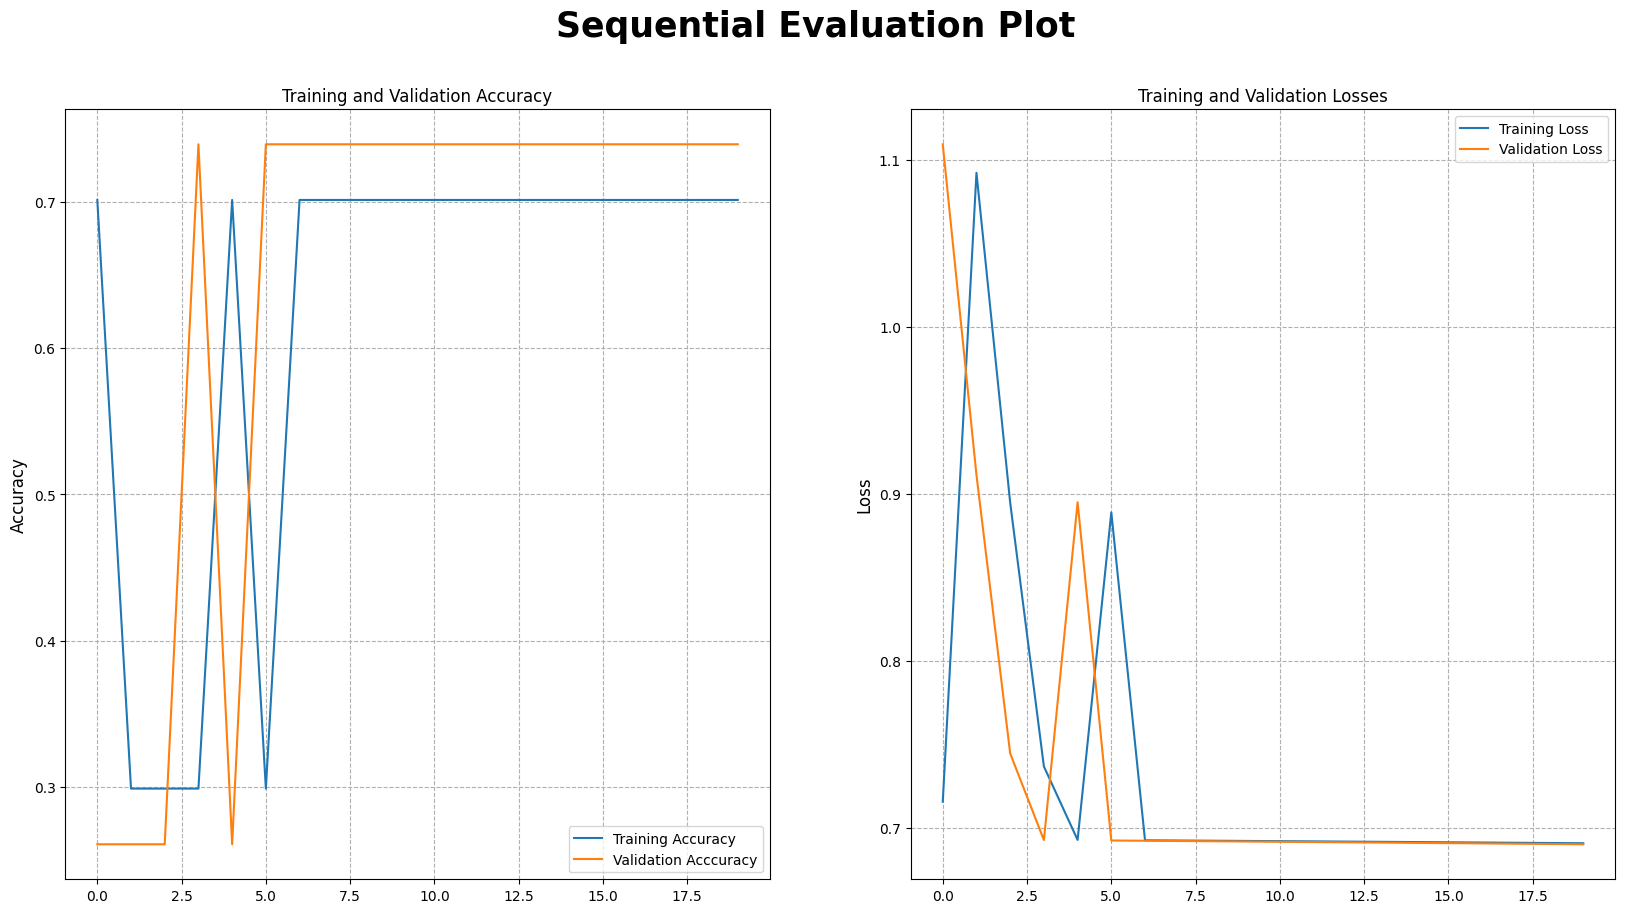

In [45]:
#Visualisasi hasil training
fig, ax = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('Sequential Evaluation Plot', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(metrics_df.accuracy,label="Training Accuracy")
plt.plot(metrics_df.val_accuracy, label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(metrics_df.loss, label="Training Loss")
plt.plot(metrics_df.val_loss, label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

ACCURACY
* Pada plot accuracy, kedua kurva mampu mencapai diatas 70% yang menunjukan bahwa model bekerja dengan baik, namun butuh adanya improvement.
* Kedua kurva cenderung bergerak secara bersamaan ke arah yang sama.
* Kedua kurva mulai bersinggungan di epoch 2.

LOSSES
* Pada plot loss, kedua kurva mencapai loss di bawah 7%
*  Kedua kurva bersinggungan di epoch 1.

Melihat hasil training model, bisa dikatakan bahwa model bersifat sedikit overfit.

In [46]:
#Mencoba model pada test set
test_result = model.evaluate(test, verbose=1)
print('Test Result:', test_result)

1/1 [==============================] - 0s 221ms/step - loss: 0.6906 - accuracy: 0.7069
Test Result: [0.6905691027641296, 0.7068965435028076]


Pada test set, model mendapatkan accuracy sebesar 70% dan loss sebesar 6,9%.

###VII.II Base Model Evaluation

In [48]:
#Membuat Classification Report
print('Classification Report - Sequential Method')
print()

pred_test = model.predict(test)
pred_test = np.where(pred_test > 0.5, 'Cancer', 'Non_Cancer')
y_test = test_images.labels
print(classification_report(y_test, pred_test))

Classification Report - Sequential Method

1/1 [==============================] - 0s 273ms/step
              precision    recall  f1-score   support

      Cancer       0.29      1.00      0.45        17
  Non_Cancer       0.00      0.00      0.00        41

    accuracy                           0.29        58
   macro avg       0.15      0.50      0.23        58
weighted avg       0.09      0.29      0.13        58



Melihat hasil classification report diatas, model kurang bisa memprediksi dengan baik dan cenderung lebih bisa memprediksi data gambar cancer. Dengan nilai precission, recall, dan f-1 score yang di bawah harapan, model butuh adanya improvement.

###VII.III Model Improvement

In [49]:
#Membuat model improvement
model_impr = Sequential()

model_impr.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", input_shape=(128,128,3)))
model_impr.add(MaxPooling2D())

model_impr.add(Conv2D(filters=64, kernel_size=3, activation="relu", padding="valid"))
model_impr.add(MaxPooling2D())

model_impr.add(Flatten())

model_impr.add(Dense(64, activation="relu"))
model_impr.add(Dense(32, activation="relu"))

model_impr.add(Dense(1, activation="sigmoid"))

model_impr.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

model_impr.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 61504)             0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [50]:
#Mengatur Callbacks model improvement
imp_callbacks = [EarlyStopping(monitor = 'val_loss',
                           mode = 'min',
                           patience = 3,
                           restore_best_weights=True),

            ModelCheckpoint('model_impr.h5',
                            monitor='val_loss',
                            save_best_only=True)
            ]

In [51]:
#Fit ke dalam model
History_impr = model_impr.fit(train, validation_data= val, epochs=20,
                    verbose=1, callbacks=imp_callbacks)

#Fungsi untuk evaluasi model improvement
metrics_df_impr = pd.DataFrame(History_impr.history)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.6899 - accuracy: 0.6957 - val_loss: 0.9031 - val_accuracy: 0.7391
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 1.0131 - accuracy: 0.7011 - val_loss: 0.7059 - val_accuracy: 0.2826
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 0.7006 - accuracy: 0.3533 - val_loss: 0.6418 - val_accuracy: 0.7391
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.6453 - accuracy: 0.7011 - val_loss: 0.6105 - val_accuracy: 0.7391
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.6242 - accuracy: 0.7011 - val_loss: 0.6021 - val_accuracy: 0.7391
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.6237 - accuracy: 0.7011 - val_loss: 0.6000 - val_accuracy: 0.7391
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.6222 - accuracy: 0.7011 - val_loss: 0.5979 - val_accuracy: 0.7391
Epoch 8/20
1/1 [=========================

In [52]:
#Masukan ke dalam DataFrame
history_impr_seq_df = pd.DataFrame(History_impr.history)
history_impr_seq_df

loss  accuracy  val_loss  val_accuracy
0   0.689851  0.695652  0.903099      0.739130
1   1.013124  0.701087  0.705948      0.282609
2   0.700561  0.353261  0.641787      0.739130
3   0.645326  0.701087  0.610507      0.739130
4   0.624246  0.701087  0.602119      0.739130
5   0.623745  0.701087  0.600047      0.739130
6   0.622220  0.701087  0.597923      0.739130
7   0.596871  0.701087  0.598000      0.739130
8   0.586071  0.701087  0.591994      0.739130
9   0.594479  0.701087  0.583154      0.739130
10  0.563452  0.701087  0.576120      0.739130
11  0.561282  0.701087  0.564026      0.739130
12  0.549999  0.701087  0.553383      0.739130
13  0.540270  0.728261  0.536565      0.739130
14  0.499074  0.728261  0.514744      0.739130
15  0.475783  0.760870  0.496719      0.760870
16  0.433460  0.809783  0.550178      0.739130
17  0.496570  0.750000  0.563431      0.717391
18  0.470489  0.815217  0.453906      0.804348
19  0.391609  0.826087  0.510042      0.739130

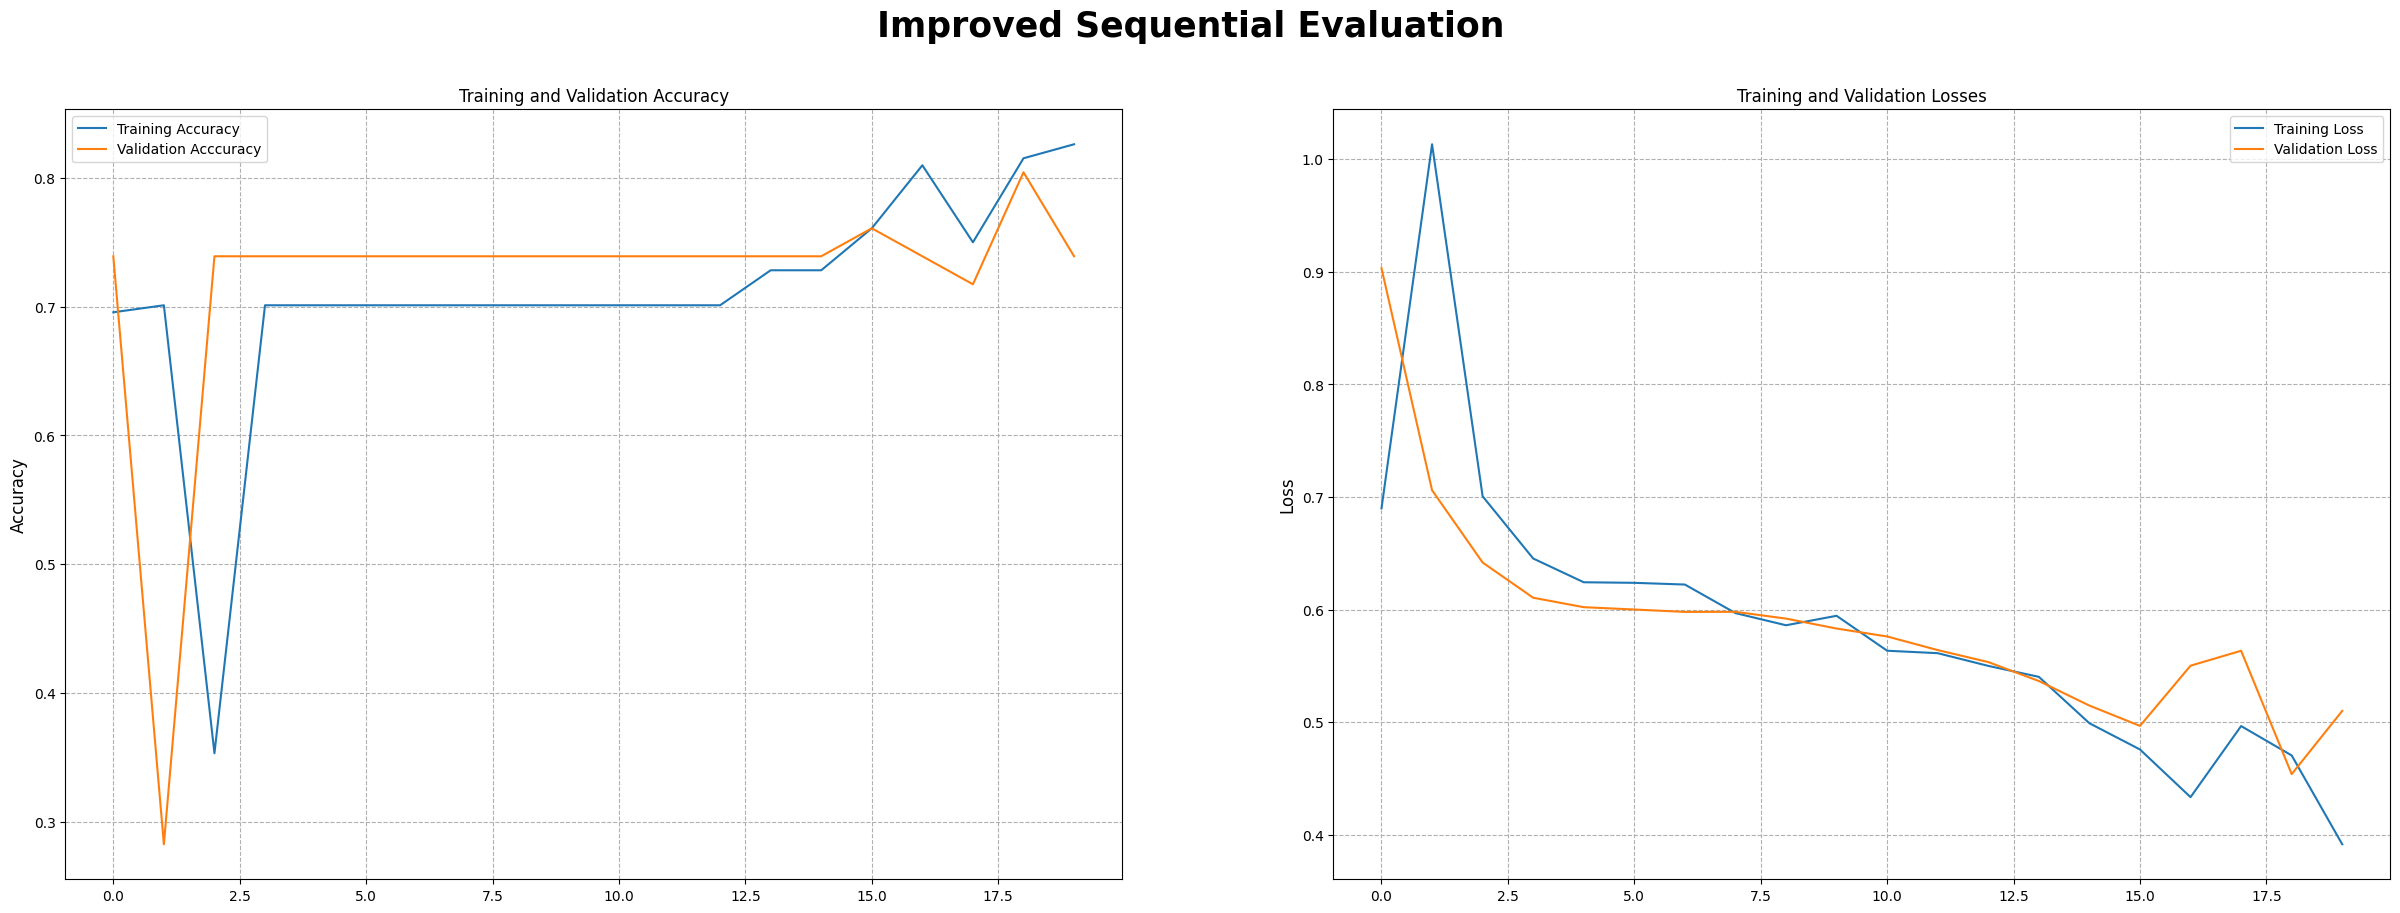

In [53]:
# Visualization
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Improved Sequential Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(metrics_df_impr.accuracy,label="Training Accuracy")
plt.plot(metrics_df_impr.val_accuracy, label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(metrics_df_impr.loss, label="Training Loss")
plt.plot(metrics_df_impr.val_loss, label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

ACCURACY
* Pada plot accuracy, kedua kurva mampu mencapai diatas 74% yang menunjukan bahwa model bekerja lebih baik.
* Kedua kurva cenderung bergerak secara bersamaan ke arah yang sama.
* Kedua kurva mulai bersinggungan di epoch 1.

LOSSES
* Pada plot loss, kedua kurva mencapai loss di bawah 5.5%
*  Kedua kurva bersinggungan di epoch 1.

Melihat hasil training model, bisa dikatakan bahwa model bersifat sedikit overfit, namun lebih baik dari yang sebelumnya.

In [55]:
#Perbandingan evaluasi pada test set

print('Base Model')
print(model.evaluate(test))

print('______'*15)

print('Improved Model')
print(model_impr.evaluate(test))

Base Model
1/1 [==============================] - 0s 220ms/step - loss: 0.6906 - accuracy: 0.7069
[0.6905691027641296, 0.7068965435028076]
__________________________________________________________________________________________
Improved Model
1/1 [==============================] - 0s 293ms/step - loss: 0.4962 - accuracy: 0.7241
[0.49618247151374817, 0.7241379022598267]


Terlihat bahwa model improvement mempunyai efek yang cukup baik dengan kenaikan di nilai accuracy dan penurunan di nilai loss.

###VII.IV Model Improvement Evaluation

In [56]:
#Perbandingan Classification Report
print('Classification Report - Sequential Method')
print()

pred_test = model.predict(test)
pred_test = np.where(pred_test > 0.5, 'Cancer', 'Non_Cancer')
y_test = test_images.labels
print(classification_report(y_test, pred_test))

print('Classification Report - Improved Sequential Method')
print()

imp_pred = model_impr.predict(test)
imp_pred = np.where(imp_pred > 0.5, 'Cancer', 'Non_Cancer')
y_test = test_images.labels
print(classification_report(y_test, imp_pred))

Classification Report - Sequential Method

1/1 [==============================] - 0s 204ms/step
              precision    recall  f1-score   support

      Cancer       0.29      1.00      0.45        17
  Non_Cancer       0.00      0.00      0.00        41

    accuracy                           0.29        58
   macro avg       0.15      0.50      0.23        58
weighted avg       0.09      0.29      0.13        58

Classification Report - Improved Sequential Method

1/1 [==============================] - 0s 290ms/step
              precision    recall  f1-score   support

      Cancer       0.27      0.88      0.42        17
  Non_Cancer       0.33      0.02      0.05        41

    accuracy                           0.28        58
   macro avg       0.30      0.45      0.23        58
weighted avg       0.32      0.28      0.15        58



Terlihat dari classification diatas bahwa model masih bekerja dengan baik dan model improvement lebih baik dalam memprediksi data gambar, namun tetap bisa lebih baik lagi.

##VIII. Model Inference

In [96]:
#Load model improvement
model = load_model('model_impr.h5')

In [97]:
# Define function to load images
def load_img(filename, img_shape=128):
  img = read_file(filename) # read image
  img = decode_image(img, channels=3) # convert to RGB
  img = resize(img, size=[img_shape, img_shape]) # resize to 128x128
  img = img/255. # Rescale to 0-1
  return img

In [98]:
#Load image baru untuk prediksi
inf1 = load_img('/content/drive/MyDrive/cancer_dataset/inf_1.jpg')
inf2 = load_img('/content/drive/MyDrive/cancer_dataset/inf_2_non.jpg')

URL data inference

cancer = https://www.bing.com/images/search?view=detailV2&ccid=8rf5vFxE&id=9D2F5C55167D12A455A5986A9C4EDCCAD3F34A84&thid=OIP.8rf5vFxEnTRwtgy21WEnmwHaGA&mediaurl=https%3a%2f%2fth.bing.com%2fth%2fid%2fR.f2b7f9bc5c449d3470b60cb6d561279b%3frik%3dhErz08rcTpxqmA%26riu%3dhttp%253a%252f%252fmedicalpictures.net%252fwp-content%252fuploads%252f2011%252f10%252fskin-cancer-pictures-4.jpg%26ehk%3d9VB5FHiH5xHOZXaaMPdJLyJPZ%252brZYR%252bMg%252b2X1x5jgkQ%253d%26risl%3d%26pid%3dImgRaw%26r%3d0&exph=581&expw=716&q=skin+cancer+image&simid=608023247738665230&FORM=IRPRST&ck=C11ECE75787F69A7E861BC1430992AE8&selectedIndex=33&ajaxhist=0&ajaxserp=0

non_cancer = https://www.bing.com/images/search?view=detailV2&ccid=w7G61Cj8&id=7A75553151C6E7F306C7BA56E292CE13C943E8A5&thid=OIP.w7G61Cj8EVvyUBZDMez5qgAAAA&mediaurl=https%3a%2f%2fth.bing.com%2fth%2fid%2fR.c3b1bad428fc115bf250164331ecf9aa%3frik%3dpehDyRPOkuJWug%26riu%3dhttp%253a%252f%252fmedia.neurologyadvisor.com%252fimages%252fdsm%252fch4307.fig3.jpg%26ehk%3dtQy%252bnX8xW7eTyHunJzEEn6gF2oxlQjlED7Hzl%252fAvUa0%253d%26risl%3d%26pid%3dImgRaw%26r%3d0%26sres%3d1%26sresct%3d1%26srh%3d799%26srw%3d977&exph=235&expw=287&q=non+skin+cancer+image&simid=608011840304326733&FORM=IRPRST&ck=CF78EDA71F49B19CC1CACF3304E782B3&selectedIndex=76&ajaxhist=0&ajaxserp=0

1/1 [==============================] - 0s 21ms/step


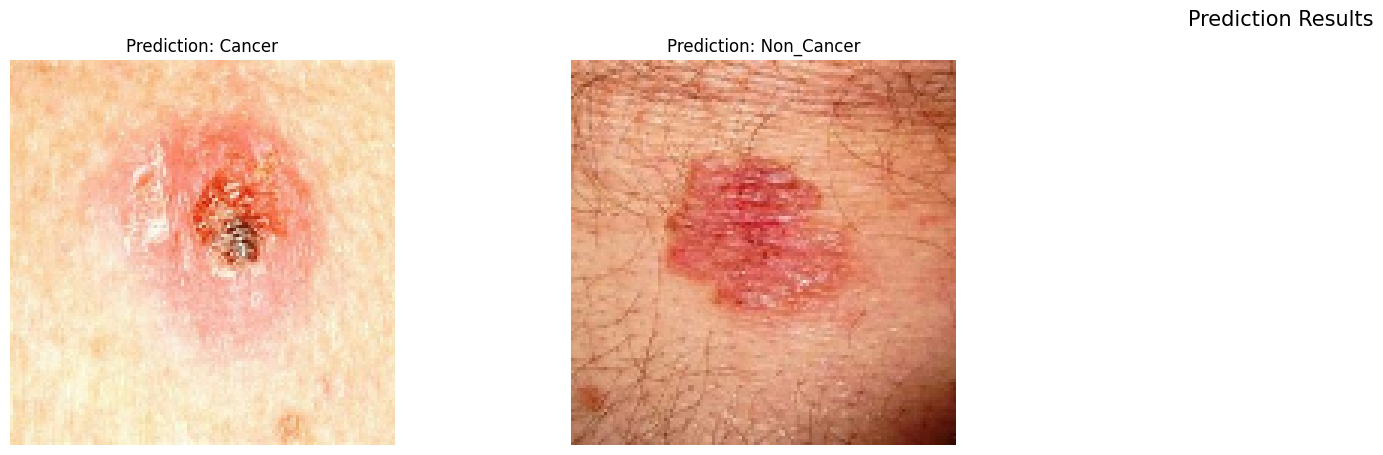

In [99]:
# Predict and show result
plt.figure(figsize=(35, 5))
plt.suptitle('Prediction Results', fontsize=15)
counter = 1
for i in [inf1, inf2]:
    plt.subplot(1, 5, counter)
    res = int(tf.round(model.predict(x=expand_dims(i, axis=0))))
    plt.imshow(i)
    plt.title(f"Prediction: {'Non_Cancer' if res == 0 else 'Cancer'}")
    plt.axis('off')
    counter += 1
plt.show()

##IX. Kesimpulan

* Data gambar non cancer memiliki persentase lebih besar yaitu 70.8% dibandingkan data gambar cancer yang mempunyai persentase lebih kecil yaitu 29.2%. Dengan terlihatnya data gambar non cancer yang lebih banyak daripada data gambar cancer, menunjukan bahwa dataset ini imbalance.

* Data gambar cancer rata-rata size sebesar 250, size terkecil 210, dan size terbesar 290. Untuk pixel mempunyai rata-rata 123.89, paling kecil 37 dan paling besar 231. Data gambar non cancer rata-rata size sebesar 225, size terkecil 240, dan size terbesar 270. Untuk pixel mempunyai rata-rata 179.23, paling kecil 100 dan paling besar 246.

* Base model kurang bisa memprediksi dengan baik dan cenderung lebih bisa memprediksi data gambar cancer. Dengan nilai precission, recall, dan f-1 score yang di bawah harapan, model butuh adanya improvement.

* Model Improvement bekerja lebih baik dalam memprediksi data gambar dibandingkan base model, namun tetap bisa lebih baik lagi.

INSIGHTS :
* Bila memungkinkan, sebaiknya dataset yang diberikan berupa hasil foto MRI pasien yang memeriksa apakah mengidap kanker kulit atau tidak.